In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy
import time

def init(N,L):
    """returns a list of N occupied sites and an LxL lattice with 0's for
       empty sites and integers >0 corresponding to non-empty sites. """
    lattice = numpy.zeros((L,L),dtype=numpy.int8)#Initialize empty lattice
    occupied = numpy.random.choice(L*L,N,replace=False)
    for i,site in enumerate(occupied):
        lattice[site//L][site%L] = i+1 #convert index on [0,V**2) to [0,V)[0,V)
    return occupied, lattice
        
def adjacent(site,L):
    """Return a tuple with indices corresponding to the four sites adjacent
       to the one passed in, wrapping around a LxL periodic volume."""
    row = site//L
    col = site%L
    left = ((col - 1 + L) % L) + row*L
    right = ((col + 1) % L) + row*L
    up =  ((row - 1 + L) % L)*L + col
    down =  ((row + 1) % L)*L + col
    return (right, down, up, left)
    
def energy(occupied,lattice,epsilon=-1):
    """Returns the total potential energy for the occupied sites on a lattice."""
    U = 0
    L = len(lattice)
    for site in occupied: #loop over all sites
        for neighbor in adjacent(site,L)[:2]: #Look right and down so we  don't double count
            if lattice[neighbor//L][neighbor%L] != 0:
                U+=epsilon
    return U

def trial_move(occupied,lattice,T):
    L=len(lattice)
    V = L*L
    Uo = energy(occupied,lattice)
    numpy.random.shuffle(occupied) #shuffles the elements of occupied
    old = occupied[0]
    empty_mask = numpy.isin(numpy.arange(V),occupied,invert=True)
    empty_sites = numpy.arange(V)[empty_mask] # list of empty sites
    new = empty_sites[numpy.random.randint(len(empty_sites))]
    occupied[0]= new
    lattice[new//L][new%L] = lattice[old//L][old%L]
    lattice[old//L][old%L] = 0
    Un = energy(occupied,lattice)
    if (Un<=Uo) or numpy.random.random() < numpy.exp(-(Un-Uo)/T):
        return occupied, lattice, Un
    lattice[old//L][old%L] = lattice[new//L][new%L]
    lattice[new//L][new%L] = 0
    occupied[0]=old
    return occupied, lattice, Uo

def run(nsteps,T,occupied, lattice):
    U = []
    for step in range(int(nsteps)):
        occupied, lattice, u = trial_move(occupied, lattice,T)
        U.append(u)
    return numpy.array(U)/len(occupied)

def analyze(data):
    a = numpy.average(data)
    s = numpy.std(data)
    return a,s

In [3]:
Temps = numpy.arange(0.1,2.,0.1)
Sizes = range(10,100,10)
results = {}
for N in Sizes:
    print(N)
    onerun = []
    for T in Temps:
        print("\t",T)
        occupied, lattice = init(N,10) # N, L
        start = time.time()
        U = run(1e3,T,occupied, lattice)
        a, s = analyze(U)
        finish = time.time()
        onerun.append((a,s,finish-start))
        results[N] =  numpy.array(onerun)

10
	 0.1
	 0.2
	 0.30000000000000004
	 0.4
	 0.5
	 0.6
	 0.7000000000000001
	 0.8
	 0.9
	 1.0
	 1.1
	 1.2000000000000002
	 1.3000000000000003
	 1.4000000000000001
	 1.5000000000000002
	 1.6
	 1.7000000000000002
	 1.8000000000000003
	 1.9000000000000001
20
	 0.1
	 0.2
	 0.30000000000000004
	 0.4
	 0.5
	 0.6
	 0.7000000000000001
	 0.8
	 0.9
	 1.0
	 1.1
	 1.2000000000000002
	 1.3000000000000003
	 1.4000000000000001
	 1.5000000000000002
	 1.6
	 1.7000000000000002
	 1.8000000000000003
	 1.9000000000000001
30
	 0.1
	 0.2
	 0.30000000000000004
	 0.4
	 0.5
	 0.6
	 0.7000000000000001
	 0.8
	 0.9
	 1.0
	 1.1
	 1.2000000000000002
	 1.3000000000000003
	 1.4000000000000001
	 1.5000000000000002
	 1.6
	 1.7000000000000002
	 1.8000000000000003
	 1.9000000000000001
40
	 0.1
	 0.2
	 0.30000000000000004
	 0.4
	 0.5
	 0.6
	 0.7000000000000001
	 0.8
	 0.9
	 1.0
	 1.1
	 1.2000000000000002
	 1.3000000000000003
	 1.4000000000000001
	 1.5000000000000002
	 1.6
	 1.7000000000000002
	 1.8000000000000003
	 1.90000

Text(0, 0.5, '<Seconds>')

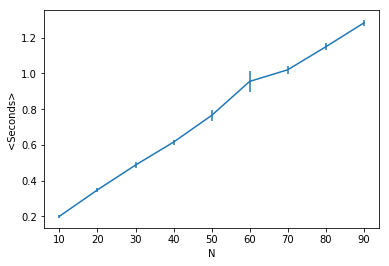

In [4]:
times = []
for N in Sizes:
    times.append((numpy.average(results[N][:,2]),numpy.std(results[N][:,2])))
times = numpy.array(times)
plt.errorbar(Sizes,times[:,0],times[:,1])
plt.xlabel("N")
plt.ylabel("<Seconds>")

Text(0, 0.5, '<U>')

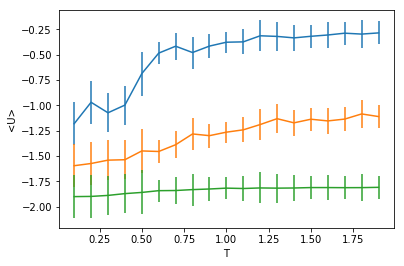

In [5]:
plt.errorbar(Temps,results[10][:,0],results[20][:,1])
plt.errorbar(Temps,results[50][:,0],results[20][:,1])
plt.errorbar(Temps,results[90][:,0],results[20][:,1])
plt.xlabel("T")
plt.ylabel("<U>")

In [7]:
U/len(occupied)

array([-0.01975309, -0.01975309, -0.01975309, -0.01987654, -0.01987654,
       -0.01987654, -0.01987654, -0.01975309, -0.01987654, -0.01987654,
       -0.01987654, -0.01987654, -0.01987654, -0.01987654, -0.01987654,
       -0.01975309, -0.02      , -0.02      , -0.02      , -0.02012346,
       -0.02012346, -0.02012346, -0.02012346, -0.02024691, -0.02012346,
       -0.02012346, -0.02012346, -0.02      , -0.01987654, -0.01987654,
       -0.01987654, -0.01987654, -0.01987654, -0.01987654, -0.01987654,
       -0.02      , -0.02      , -0.02      , -0.02012346, -0.02012346,
       -0.02012346, -0.02012346, -0.02012346, -0.02012346, -0.02012346,
       -0.02      , -0.02      , -0.02      , -0.02      , -0.02      ,
       -0.01987654, -0.02      , -0.02      , -0.02012346, -0.02012346,
       -0.02      , -0.02012346, -0.02      , -0.01987654, -0.01987654,
       -0.02      , -0.02      , -0.02      , -0.02      , -0.02      ,
       -0.01987654, -0.01987654, -0.01987654, -0.01987654, -0.01

In [9]:
len(occupied)

90